# 101 Evaluate tracking states and confidence scores

In [1]:
load_from_config = True
raw_data_folder = ""
preprocessed_data_folder = ""

In [2]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open('../config.yaml') as file:
  params= yaml.safe_load(file)

In [4]:
# in case of a automatic run
if not load_from_config:
    params['raw_data_folder'] = raw_data_folder
    params['preprocessed_data_folder'] = preprocessed_data_folder

In [5]:
preprocessed_data_folder = params['data_folder'] + params['preprocessed_data_folder']
df_humans = pd.read_pickle(preprocessed_data_folder + 'pp_humans.pkl')

## Tracking states

https://www.stereolabs.com/docs/ros2/custom-msgs#object-detection-and-body-tracking-custom-messages

```
# Status constants
# SEARCHING - The camera is searching for a previously known position to locate itself
# OK - Positional tracking is working normally
# OFF - Positional tracking is not enabled.
# FPS_TOO_LOW - Effective FPS is too low to give proper results for motion tracking. Consider using PERFORMANCES parameters (DEPTH_MODE_PERFORMANCE, low camera resolution (VGA,HD720))
# SEARCHING_FLOOR_PLANE - The camera is searching for the floor plane to locate itself related to it, the REFERENCE_FRAME::WORLD will be set afterward.
uint8 SEARCHING=0 
uint8 OK = 1
uint8 OFF = 2
uint8 FPS_TOO_LOW = 3
uint8 SEARCHING_FLOOR_PLANE = 3

# Status
uint8 status
```

In [6]:
df_humans['obj.tracking_state'].value_counts()

obj.tracking_state
1    53089
2     6327
Name: count, dtype: int64

<Axes: xlabel='obj.human_pos.x_robot', ylabel='obj.human_pos.y_robot'>

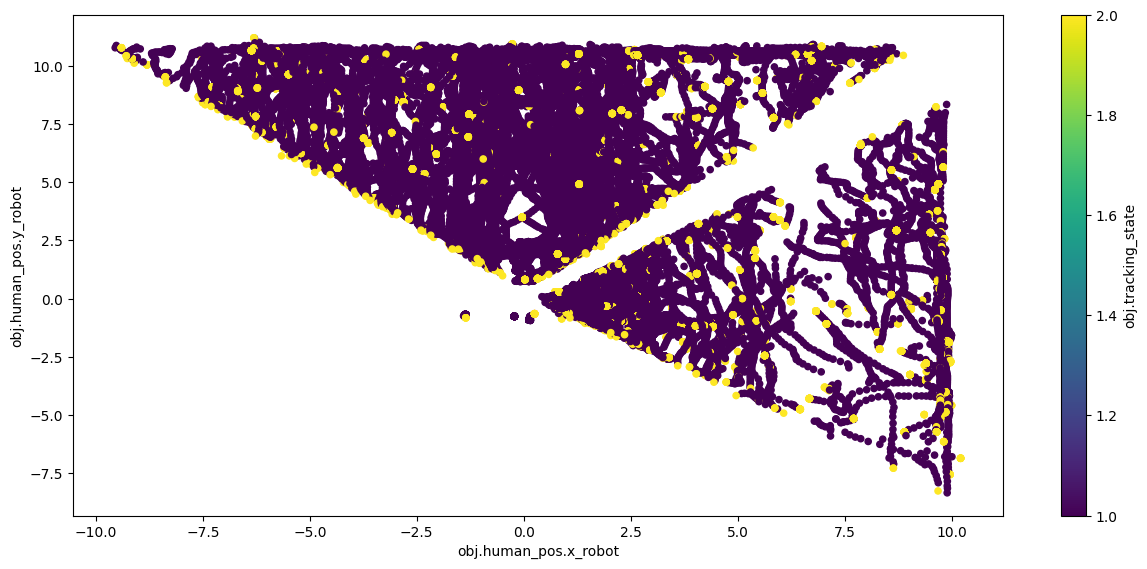

In [7]:
df_humans.plot.scatter(x='obj.human_pos.x_robot', y='obj.human_pos.y_robot',
                       c='obj.tracking_state', colormap='viridis', figsize=(15,6.5))

## Confidence scores

<Axes: xlabel='obj.human_pos.x_robot', ylabel='obj.human_pos.y_robot'>

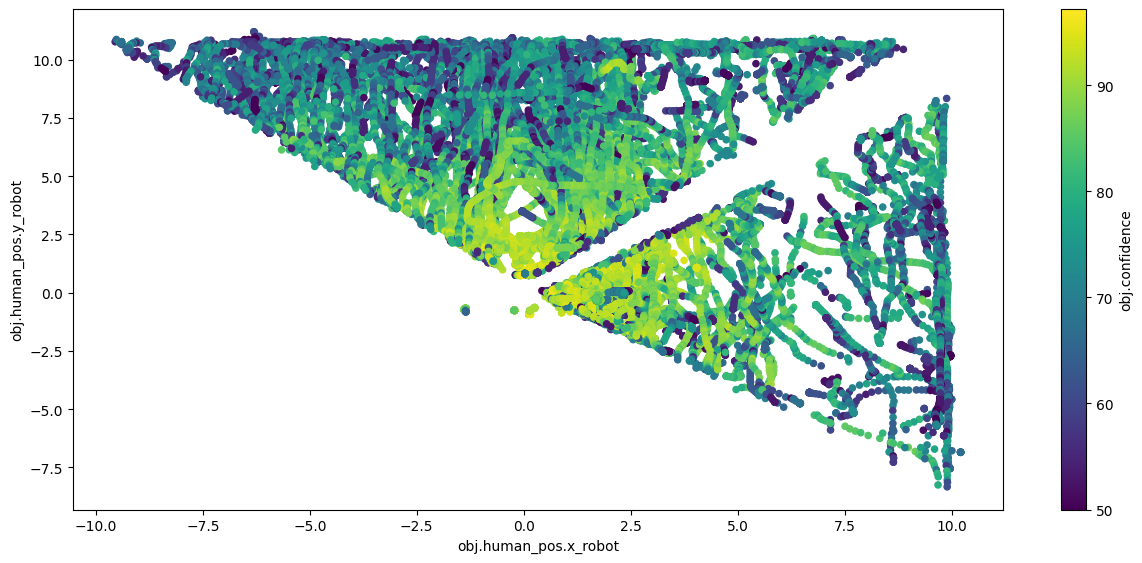

In [8]:
df_humans.plot.scatter(x='obj.human_pos.x_robot', y='obj.human_pos.y_robot', c='obj.confidence', colormap='viridis', figsize=(15,6.5))

<Axes: >

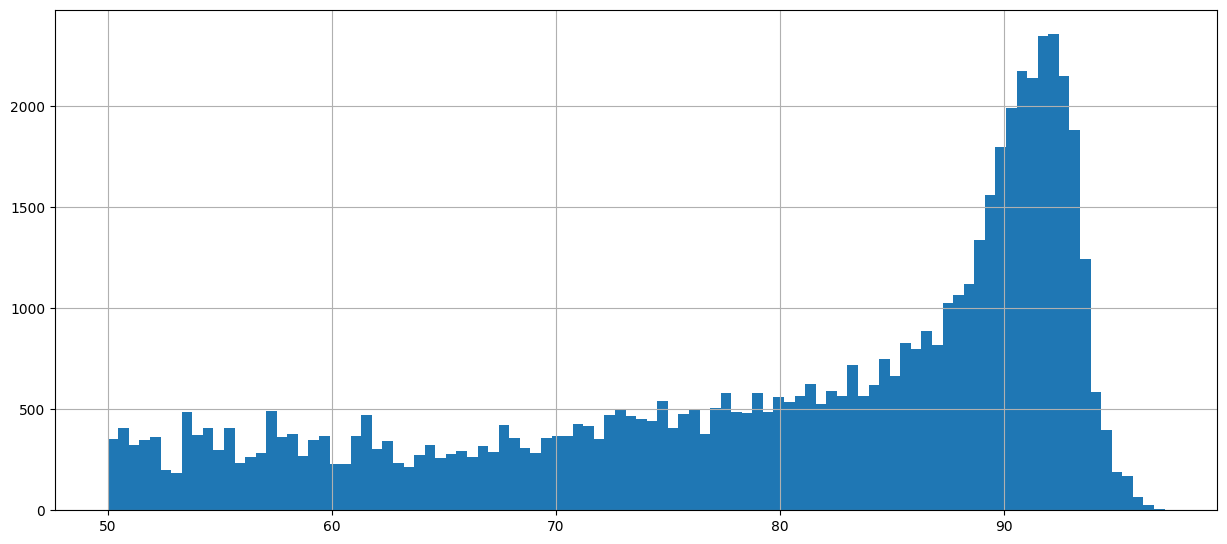

In [9]:
df_humans['obj.confidence'].hist(bins=100, figsize=(15,6.5))

In [10]:
# Did a track reach a confidence level of 90% at least one time?

confidence_level = 85
df_relevant_tracks = df_humans.groupby('obj.label_id_unique')['obj.confidence'].max() 
relevant_tracks = df_relevant_tracks[df_relevant_tracks > confidence_level].index

df_humans['valid_track'] = df_humans['obj.label_id_unique'].isin(relevant_tracks)

df_humans['valid_track'].value_counts()

valid_track
True     47730
False    11686
Name: count, dtype: int64

In [11]:
pd.to_pickle(df_humans, preprocessed_data_folder + params['preprocessed_file_labels']+ "humans.pkl")